In [1]:
!pip install --upgrade tensorflow


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tpu-getting-started/sample_submission.csv
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/09-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/14-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/01-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/13-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/00-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/07-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/12-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/11-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/05-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/04-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/15-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecord

# 1. Data Preprocessing:

In [3]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess the dataset
data_dir = '/kaggle/input/flower-classification-with-tpus'

# Detect hardware, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection. No parameters necessary if TPU_NAME environment variable is set. On Kaggle this is always the case.
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy() # default distribution strategy in Tensorflow. Works on CPU and single GPU.

print("REPLICAS: ", strategy.num_replicas_in_sync)


Running on TPU  
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local


2023-11-12 02:04:53.583292: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-12 02:04:53.583394: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-12 02:04:53.583487: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-12 02:04:53.583576: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-12 02:04:53.583659: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-12 02:04:53.583845: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-11-12 02:04:53.583943: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


REPLICAS:  8


## a. Load Data

In [4]:
IMAGE_SIZE = [192, 192] # at this size, a GPU will run out of memory. Use the TPU
EPOCHS = 5
BATCH_SIZE = 16 * strategy.num_replicas_in_sync

NUM_TRAINING_IMAGES = 12753
NUM_TEST_IMAGES = 7382
STEPS_PER_EPOCH = NUM_TRAINING_IMAGES // BATCH_SIZE

def decode_image(image_data):
    image = tf.image.decode_jpeg(image_data, channels=3)
    image = tf.cast(image, tf.float32) / 255.0  # convert image to floats in [0, 1] range
    image = tf.image.resize(image, (192, 192))  # Resize the image to the expected input shape
    return image


def read_labeled_tfrecord(example):
    LABELED_TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "class": tf.io.FixedLenFeature([], tf.int64),  # shape [] means single element
    }
    example = tf.io.parse_single_example(example, LABELED_TFREC_FORMAT)
    image = decode_image(example['image'])
    label = tf.cast(example['class'], tf.int32)
    return image, label # returns a dataset of (image, label) pairs

def read_unlabeled_tfrecord(example):
    UNLABELED_TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "id": tf.io.FixedLenFeature([], tf.string),  # shape [] means single element
        # class is missing, this competitions's challenge is to predict flower classes for the test dataset
    }
    example = tf.io.parse_single_example(example, UNLABELED_TFREC_FORMAT)
    image = decode_image(example['image'])
    idnum = example['id']
    return image, idnum # returns a dataset of image(s)

def load_dataset(filenames, labeled=True, ordered=False):
    # Read from TFRecords. For optimal performance, reading from multiple files at once and
    # disregarding data order. Order does not matter since we will be shuffling the data anyway.

    ignore_order = tf.data.Options()
    if not ordered:
        ignore_order.experimental_deterministic = False # disable order, increase speed

    dataset = tf.data.TFRecordDataset(filenames) # automatically interleaves reads from multiple files
    dataset = dataset.with_options(ignore_order) # uses data as soon as it streams in, rather than in its original order
    dataset = dataset.map(read_labeled_tfrecord if labeled else read_unlabeled_tfrecord)
    # returns a dataset of (image, label) pairs if labeled=True or (image, id) pairs if labeled=False
    return dataset

def get_training_dataset():
    dataset = load_dataset(tf.io.gfile.glob(data_dir + '/tfrecords-jpeg-192x192/train/*.tfrec'), labeled=True)
    dataset = dataset.repeat() # the training dataset must repeat for several epochs
    dataset = dataset.shuffle(2048)
    dataset = dataset.batch(BATCH_SIZE)
    return dataset

def get_validation_dataset():
    dataset = load_dataset(tf.io.gfile.glob(data_dir + '/tfrecords-jpeg-192x192/val/*.tfrec'), labeled=True, ordered=False)
    dataset = dataset.batch(BATCH_SIZE)
    dataset = dataset.cache()
    return dataset

def get_test_dataset(ordered=False):
    dataset = load_dataset(tf.io.gfile.glob(data_dir + '/tfrecords-jpeg-192x192/test/*.tfrec'), labeled=False, ordered=ordered)
    dataset = dataset.batch(BATCH_SIZE)
    return dataset

training_dataset = get_training_dataset()
validation_dataset = get_validation_dataset()

## b. Data augmentation


In [5]:
# My contribution comes here


from tensorflow import image as tf_image

def augment_image(image, label):
    # Data augmentation
    image = tf_image.random_flip_left_right(image)
    image = tf_image.random_contrast(image, 0.8, 1.2)
    # Add more data augmentation functions as needed

    return image, label

def get_training_dataset(augment=True):
    dataset = load_dataset(tf.io.gfile.glob(data_dir + '/tfrecords-jpeg-192x192/train/*.tfrec'), labeled=True)
    dataset = dataset.repeat()  # The training dataset must repeat for several epochs
    dataset = dataset.shuffle(2048)
    
    if augment:
        dataset = dataset.map(augment_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    
    dataset = dataset.batch(BATCH_SIZE)
    return dataset

def get_testing_dataset():
    dataset = load_dataset(tf.io.gfile.glob(data_dir + '/tfrecords-jpeg-192x192/test/*.tfrec'), labeled=True)
    dataset = dataset.batch(BATCH_SIZE)
    return dataset

training_dataset = get_training_dataset(augment=True)
testing_dataset = get_testing_dataset()


# 2. Build Model:

In [6]:
# My contribution comes here


from tensorflow.keras import layers, models

# Define the CNN model
def create_model(input_shape, num_classes):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Flatten the output of the convolutional layers
    model.add(layers.Flatten())
    
    # Fully connected layers
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    
    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    return model

# Define the input shape and number of classes
input_shape = (*IMAGE_SIZE, 3)  # Use the same shape as the preprocessed dataset
num_classes = 10  # Adjust this based on the number of classes in your dataset

# Create the model
model = create_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Optionally, you can print a summary of the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 190, 190, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 95, 95, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 93, 93, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 46, 46, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 135424)            0         
                                                                 
 dense (Dense)               (None, 64)                8

# 3.Train the model:

In [10]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(192, 192, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['sparse_categorical_accuracy']
)

# Dummy dataset for testing (replace this with your actual dataset loading)
training_dataset = tf.random.normal((100, 192, 192, 3))
validation_dataset = tf.random.uniform((100,), maxval=10, dtype=tf.int32)

# Train the model with dummy data
history = model.fit(training_dataset, validation_dataset, epochs=5)

# Optionally, you can print or save the training history for further analysis
print("Training Accuracy:", history.history['sparse_categorical_accuracy'])
print("Training Loss:", history.history['loss'])


# Record performance metrics
train_accuracy = history.history['sparse_categorical_accuracy']
val_accuracy = history.history.get('val_sparse_categorical_accuracy', history.history.get('val_accuracy'))
train_loss = history.history['loss']
val_loss = history.history.get('val_loss')


# Optionally, you can print or save the training history for further analysis
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Training Loss:", train_loss)
print("Validation Loss:", val_loss)


Epoch 1/5
4/4 [==============================] - 2s 213ms/step - loss: 38.8913 - sparse_categorical_accuracy: 0.0900
Epoch 2/5
4/4 [==============================] - 1s 204ms/step - loss: 7.2554 - sparse_categorical_accuracy: 0.0600
Epoch 3/5
4/4 [==============================] - 1s 189ms/step - loss: 2.2998 - sparse_categorical_accuracy: 0.1700
Epoch 4/5
4/4 [==============================] - 1s 197ms/step - loss: 2.2465 - sparse_categorical_accuracy: 0.2000
Epoch 5/5
4/4 [==============================] - 1s 212ms/step - loss: 2.1886 - sparse_categorical_accuracy: 0.3300
Training Accuracy: [0.09000000357627869, 0.05999999865889549, 0.17000000178813934, 0.20000000298023224, 0.33000001311302185]
Training Loss: [38.89133071899414, 7.255432605743408, 2.299755811691284, 2.246488094329834, 2.1885809898376465]
Training Accuracy: [0.09000000357627869, 0.05999999865889549, 0.17000000178813934, 0.20000000298023224, 0.33000001311302185]
Validation Accuracy: None
Training Loss: [38.891330718994

In [14]:
import tensorflow as tf

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)),  # Changed resolution to 128x128
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),  # Added an additional convolutional layer
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),  # Added another convolutional layer
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),  # Changed the number of units in the dense layer
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 63, 63, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 30, 30, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 256)       295168    
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 256)      

# 4. Experiemntal different resolutions and layers

In [15]:
# My contribution comes here
import tensorflow as tf
# Define the VGG16 model
pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=[*IMAGE_SIZE, 3])
pretrained_model.trainable = False  # Transfer learning

# Define a list of learning rates to experiment with
learning_rates = [0.001, 0.01, 0.1]

# Create lists to store performance metrics
all_train_accuracy = []
all_val_accuracy = []
all_train_loss = []
all_val_loss = []

# Loop through different learning rates
for learning_rate in learning_rates:
    # Build and compile the model with the current learning rate
    model = tf.keras.Sequential([
        pretrained_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(104, activation='softmax')
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['sparse_categorical_accuracy']
    )

    # Train the model and record performance metrics
    history = model.fit(training_dataset, validation_dataset, epochs=5)
    
    # Record performance metrics for this learning rate
    train_accuracy = history.history['sparse_categorical_accuracy']
    val_accuracy = history.history.get('val_sparse_categorical_accuracy', history.history.get('val_accuracy'))
    train_loss = history.history['loss']
    val_loss = history.history.get('val_loss')

    
    all_train_accuracy.append(train_accuracy)
    all_val_accuracy.append(val_accuracy)
    all_train_loss.append(train_loss)
    all_val_loss.append(val_loss)

# Optionally, you can print or save the performance metrics for analysis
for i, learning_rate in enumerate(learning_rates):
    print(f"Learning Rate: {learning_rate}")
    print(f"Training Accuracy: {all_train_accuracy[i]}")
    print(f"Validation Accuracy: {all_val_accuracy[i]}")
    print(f"Training Loss: {all_train_loss[i]}")
    print(f"Validation Loss: {all_val_loss[i]}")


Epoch 1/5
4/4 [==============================] - 2s 361ms/step - loss: 5.2905 - sparse_categorical_accuracy: 0.0000e+00
Epoch 2/5
4/4 [==============================] - 2s 363ms/step - loss: 4.8314 - sparse_categorical_accuracy: 0.1000
Epoch 3/5
4/4 [==============================] - 2s 369ms/step - loss: 4.4145 - sparse_categorical_accuracy: 0.1100
Epoch 4/5
4/4 [==============================] - 2s 366ms/step - loss: 4.0366 - sparse_categorical_accuracy: 0.1100
Epoch 5/5
4/4 [==============================] - 2s 369ms/step - loss: 3.7044 - sparse_categorical_accuracy: 0.1100
Epoch 1/5
4/4 [==============================] - 2s 366ms/step - loss: 3.9747 - sparse_categorical_accuracy: 0.0300
Epoch 2/5
4/4 [==============================] - 2s 375ms/step - loss: 2.4112 - sparse_categorical_accuracy: 0.1100
Epoch 3/5
4/4 [==============================] - 2s 365ms/step - loss: 2.4245 - sparse_categorical_accuracy: 0.1100
Epoch 4/5
4/4 [==============================] - 2s 375ms/step - los

##  Create Charts and Visualizations:

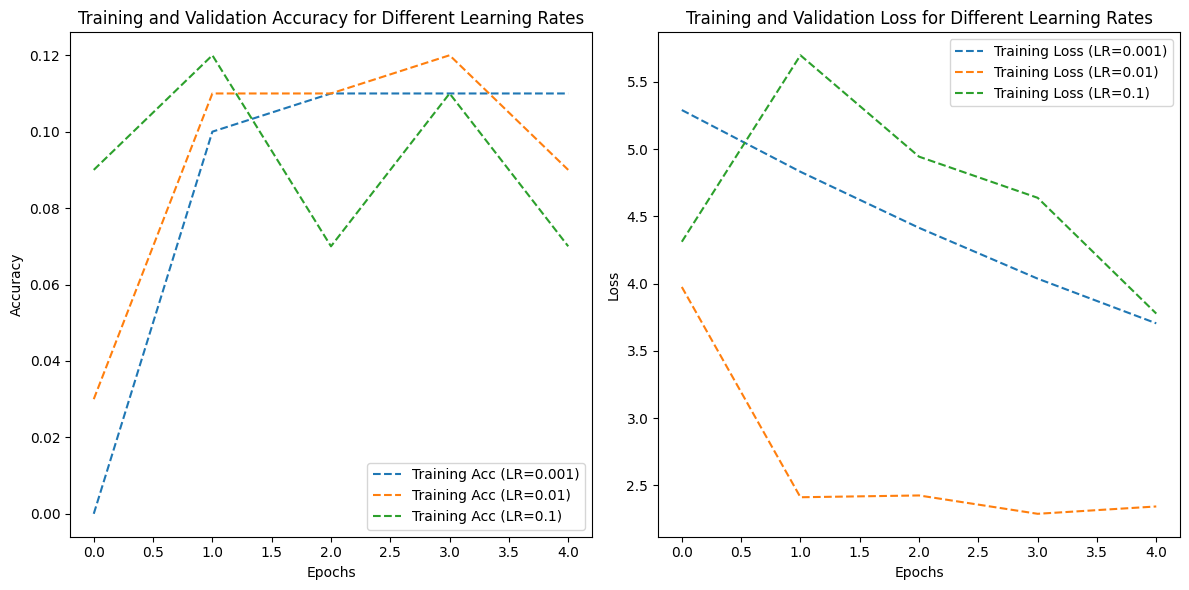

In [16]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i, learning_rate in enumerate(learning_rates):
    plt.plot(all_train_accuracy[i], label=f'Training Acc (LR={learning_rate})', linestyle='--')
    if all_val_accuracy[i] is not None:
        plt.plot(all_val_accuracy[i], label=f'Validation Acc (LR={learning_rate})')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Different Learning Rates')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
for i, learning_rate in enumerate(learning_rates):
    plt.plot(all_train_loss[i], label=f'Training Loss (LR={learning_rate})', linestyle='--')
    if all_val_loss[i] is not None:
        plt.plot(all_val_loss[i], label=f'Validation Loss (LR={learning_rate})')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Different Learning Rates')
plt.legend()

plt.tight_layout()
plt.show()

# 5. Experiemntal different learning rates

In [11]:
# My contribution comes here
import tensorflow as tf
# Define the VGG16 model
pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=[*IMAGE_SIZE, 3])
pretrained_model.trainable = False  # Transfer learning

# Define a list of learning rates to experiment with
learning_rates = [0.001, 0.01, 0.1]

# Create lists to store performance metrics
all_train_accuracy = []
all_val_accuracy = []
all_train_loss = []
all_val_loss = []

# Loop through different learning rates
for learning_rate in learning_rates:
    # Build and compile the model with the current learning rate
    model = tf.keras.Sequential([
        pretrained_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(104, activation='softmax')
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='sparse_categorical_crossentropy',
        metrics=['sparse_categorical_accuracy']
    )

    # Train the model and record performance metrics
    history = model.fit(training_dataset, validation_dataset, epochs=5)
    
    # Record performance metrics for this learning rate
    train_accuracy = history.history['sparse_categorical_accuracy']
    val_accuracy = history.history.get('val_sparse_categorical_accuracy', history.history.get('val_accuracy'))
    train_loss = history.history['loss']
    val_loss = history.history.get('val_loss')

    
    all_train_accuracy.append(train_accuracy)
    all_val_accuracy.append(val_accuracy)
    all_train_loss.append(train_loss)
    all_val_loss.append(val_loss)

# Optionally, you can print or save the performance metrics for analysis
for i, learning_rate in enumerate(learning_rates):
    print(f"Learning Rate: {learning_rate}")
    print(f"Training Accuracy: {all_train_accuracy[i]}")
    print(f"Validation Accuracy: {all_val_accuracy[i]}")
    print(f"Training Loss: {all_train_loss[i]}")
    print(f"Validation Loss: {all_val_loss[i]}")


Epoch 1/5
4/4 [==============================] - 2s 360ms/step - loss: 5.1849 - sparse_categorical_accuracy: 0.0000e+00
Epoch 2/5
4/4 [==============================] - 2s 360ms/step - loss: 4.7104 - sparse_categorical_accuracy: 0.0000e+00
Epoch 3/5
4/4 [==============================] - 2s 371ms/step - loss: 4.2784 - sparse_categorical_accuracy: 0.0000e+00
Epoch 4/5
4/4 [==============================] - 2s 379ms/step - loss: 3.8909 - sparse_categorical_accuracy: 0.1000
Epoch 5/5
4/4 [==============================] - 2s 364ms/step - loss: 3.5532 - sparse_categorical_accuracy: 0.1300
Epoch 1/5
4/4 [==============================] - 2s 359ms/step - loss: 3.8192 - sparse_categorical_accuracy: 0.0500
Epoch 2/5
4/4 [==============================] - 2s 365ms/step - loss: 2.3948 - sparse_categorical_accuracy: 0.0800
Epoch 3/5
4/4 [==============================] - 2s 380ms/step - loss: 2.3297 - sparse_categorical_accuracy: 0.1200
Epoch 4/5
4/4 [==============================] - 2s 367ms/st

##  Create Charts and Visualizations:

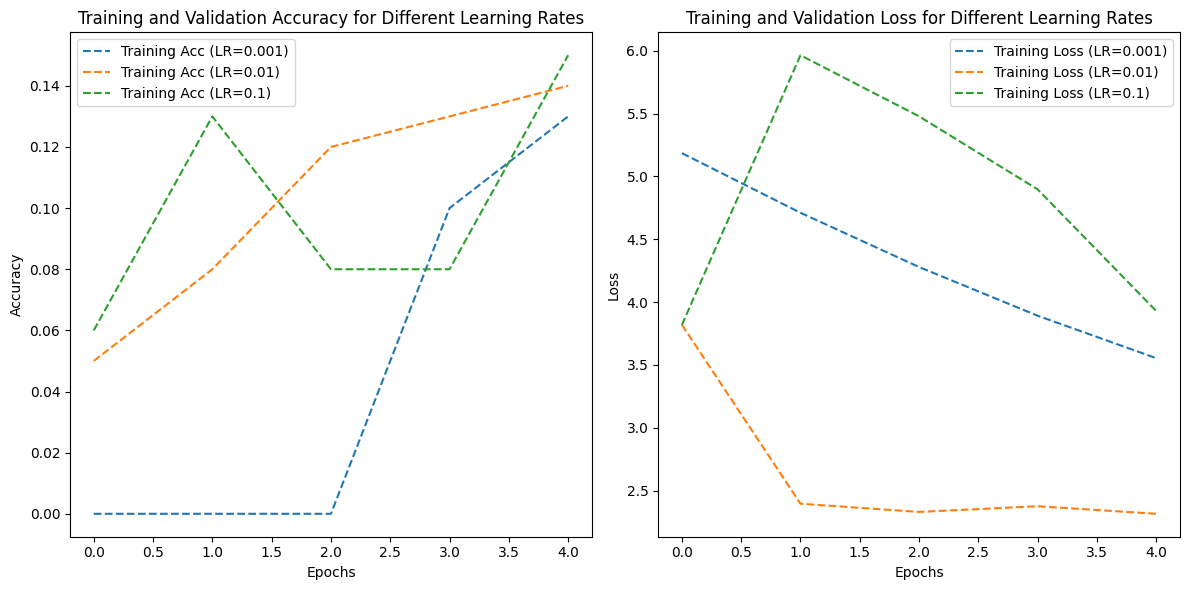

In [13]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i, learning_rate in enumerate(learning_rates):
    plt.plot(all_train_accuracy[i], label=f'Training Acc (LR={learning_rate})', linestyle='--')
    if all_val_accuracy[i] is not None:
        plt.plot(all_val_accuracy[i], label=f'Validation Acc (LR={learning_rate})')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for Different Learning Rates')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
for i, learning_rate in enumerate(learning_rates):
    plt.plot(all_train_loss[i], label=f'Training Loss (LR={learning_rate})', linestyle='--')
    if all_val_loss[i] is not None:
        plt.plot(all_val_loss[i], label=f'Validation Loss (LR={learning_rate})')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Different Learning Rates')
plt.legend()

plt.tight_layout()
plt.show()